In [ ]:
!pip install tensorflow matplotlib opencv-python tensorflow-datasets

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


In [ ]:
# MNIST Digits
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = keras.datasets.mnist.load_data()

# Normalize and reshape for CNN
x_train_mnist = x_train_mnist.astype('float32') / 255.0
x_test_mnist = x_test_mnist.astype('float32') / 255.0
x_train_mnist = x_train_mnist.reshape(-1, 28, 28, 1)
x_test_mnist = x_test_mnist.reshape(-1, 28, 28, 1)

# One-hot encode
y_train_mnist = keras.utils.to_categorical(y_train_mnist, 10)
y_test_mnist = keras.utils.to_categorical(y_test_mnist, 10)

print(f"MNIST - Train: {x_train_mnist.shape}, Test: {x_test_mnist.shape}")

MNIST - Train: (60000, 28, 28, 1), Test: (10000, 28, 28, 1)


In [ ]:
# EMNIST
!pip install tensorflow-datasets

import tensorflow_datasets as tfds
import tensorflow as tf

def load_emnist_simple():
    # Load smaller subsets for faster training
    train_ds = tfds.load('emnist/byclass', split='train[:50000]', as_supervised=True)
    test_ds = tfds.load('emnist/byclass', split='test[:10000]', as_supervised=True)

    def preprocess_emnist(image, label):
        # Fix EMNIST orientation
        image = tf.transpose(image, [1, 0, 2])
        image = tf.image.flip_left_right(image)
        image = tf.cast(image, tf.float32) / 255.0
        return image, label

    # Preprocess and convert to numpy
    x_train, y_train = [], []
    for image, label in train_ds.map(preprocess_emnist):
        x_train.append(image.numpy())
        y_train.append(label.numpy())

    # FIXED: Initialize x_test and y_test as separate lists
    x_test = []
    y_test = []
    for image, label in test_ds.map(preprocess_emnist):
        x_test.append(image.numpy())
        y_test.append(label.numpy())

    x_train = np.array(x_train)
    y_train = np.array(y_train)
    x_test = np.array(x_test)
    y_test = np.array(y_test)

    # One-hot encode
    y_train = keras.utils.to_categorical(y_train, 62)
    y_test = keras.utils.to_categorical(y_test, 62)

    return (x_train, y_train), (x_test, y_test)

# Load data
(x_train_emnist, y_train_emnist), (x_test_emnist, y_test_emnist) = load_emnist_simple()

print(f"EMNIST Train: {x_train_emnist.shape}")
print(f"EMNIST Test: {x_test_emnist.shape}")

EMNIST Train: (50000, 28, 28, 1)
EMNIST Test: (10000, 28, 28, 1)


Data Shapes:
MNIST X: (60000, 28, 28, 1), Y: (60000, 10)
EMNIST X: (50000, 28, 28, 1), Y: (50000, 62)


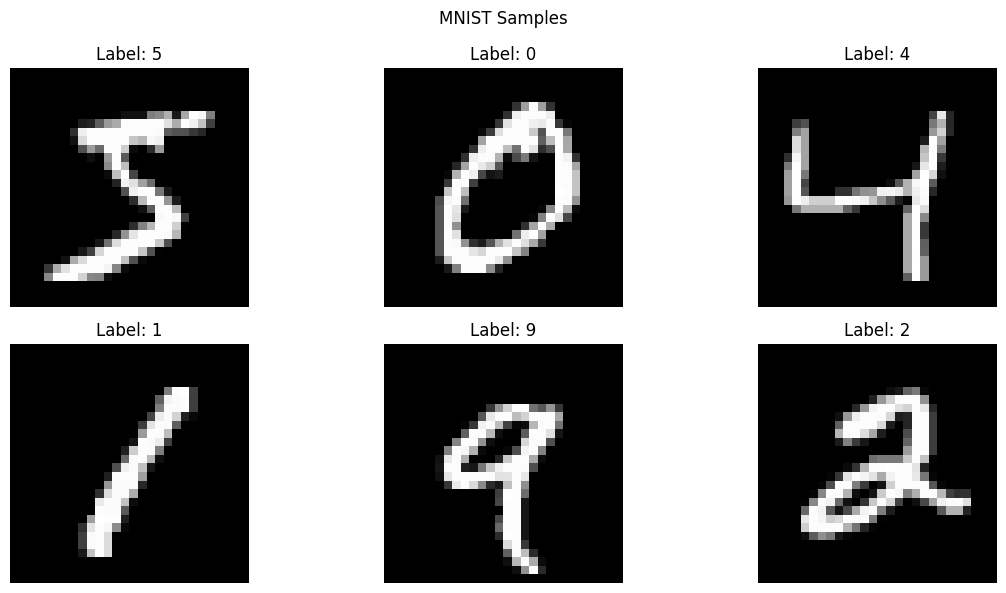

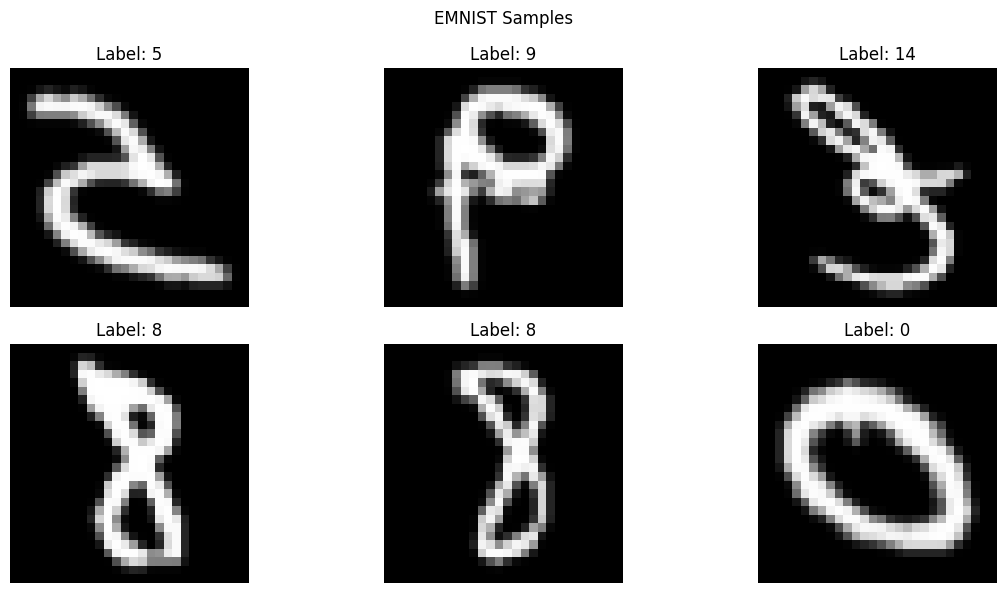

In [ ]:
# Check data shapes
print("Data Shapes:")
print(f"MNIST X: {x_train_mnist.shape}, Y: {y_train_mnist.shape}")
print(f"EMNIST X: {x_train_emnist.shape}, Y: {y_train_emnist.shape}")

# Visualize samples
def show_samples(x_data, y_data, title, num_samples=6):
    plt.figure(figsize=(12, 6))
    for i in range(num_samples):
        plt.subplot(2, 3, i+1)
        plt.imshow(x_data[i].squeeze(), cmap='gray')
        true_label = np.argmax(y_data[i])
        plt.title(f"Label: {true_label}")
        plt.axis('off')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

show_samples(x_train_mnist, y_train_mnist, "MNIST Samples")
show_samples(x_train_emnist, y_train_emnist, "EMNIST Samples")

In [ ]:
def create_simple_cnn_model(num_classes, name_suffix):
    model = keras.Sequential([
        # Simpler architecture
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ], name=f"cnn_model_{name_suffix}")

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Recreate models with simpler architecture
mnist_model = create_simple_cnn_model(10, "mnist")
emnist_model = create_simple_cnn_model(62, "emnist")

print("MNIST Model Summary:")
mnist_model.summary()

MNIST Model Summary:


Model: "cnn_model_mnist"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train MNIST model
print("Training MNIST Model...")
history_mnist = mnist_model.fit(
    x_train_mnist, y_train_mnist,
    batch_size=128,
    epochs=5,
    validation_data=(x_test_mnist, y_test_mnist),
    verbose=1
)

# Evaluate
mnist_loss, mnist_acc = mnist_model.evaluate(x_test_mnist, y_test_mnist, verbose=0)
print(f"MNIST Test Accuracy: {mnist_acc:.4f}")

Training MNIST Model...
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 57s 116ms/step - accuracy: 0.8400 - loss: 0.5433 - val_accuracy: 0.9827 - val_loss: 0.0536
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 50s 107ms/step - accuracy: 0.9766 - loss: 0.0755 - val_accuracy: 0.9851 - val_loss: 0.0428
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 109ms/step - accuracy: 0.9858 - loss: 0.0496 - val_accuracy: 0.9887 - val_loss: 0.0345
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 106ms/step - accuracy: 0.9877 - loss: 0.0411 - val_accuracy: 0.9914 - val_loss: 0.0277
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 108ms/step - accuracy: 0.9903 - loss: 0.0307 - val_accuracy: 0.9905 - val_loss: 0.0289
MNIST Test Accuracy: 0.9905


In [ ]:
# Train EMNIST model
print("Training EMNIST Model...")
history_emnist = emnist_model.fit(
    x_train_emnist, y_train_emnist,
    batch_size=128,
    epochs=3,
    validation_split=0.2,
    verbose=1
)

# Evaluate
emnist_loss, emnist_acc = emnist_model.evaluate(x_test_emnist, y_test_emnist, verbose=0)
print(f"EMNIST Test Accuracy: {emnist_acc:.4f}")

Training EMNIST Model...
Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 45s 133ms/step - accuracy: 0.4213 - loss: 2.3603 - val_accuracy: 0.7569 - val_loss: 0.8033
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 76s 116ms/step - accuracy: 0.7238 - loss: 0.8868 - val_accuracy: 0.7854 - val_loss: 0.6454
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 109ms/step - accuracy: 0.7679 - loss: 0.7082 - val_accuracy: 0.8113 - val_loss: 0.5698
EMNIST Test Accuracy: 0.8167


In [ ]:
def predict_character(model, image, is_emnist=False):
    """Predict character from image - FIXED VERSION"""
    # Ensure correct shape: (1, 28, 28, 1)
    if len(image.shape) == 2:  # If (28, 28)
        image = image.reshape(1, 28, 28, 1)
    elif len(image.shape) == 3:  # If (28, 28, 1) or (28, 28, 3)
        if image.shape[-1] == 3:  # Convert RGB to grayscale
            image = np.mean(image, axis=-1, keepdims=True)
        image = image.reshape(1, 28, 28, 1)

    # Make prediction
    prediction = model.predict(image, verbose=0)
    predicted_class = np.argmax(prediction[0])

    if is_emnist:
        # Convert EMNIST class to character
        if predicted_class < 10:
            return str(predicted_class)  # 0-9
        elif predicted_class < 36:
            return chr(ord('A') + predicted_class - 10)  # A-Z
        else:
            return chr(ord('a') + predicted_class - 36)  # a-z
    else:
        return str(predicted_class)  # 0-9 for MNIST

def test_single_prediction():
    """Test prediction on a single sample - FIXED"""
    print("Testing Single Prediction:")
    print("-" * 30)

    # Test MNIST
    idx = 0
    mnist_img = x_test_mnist[idx]
    print(f"MNIST image shape: {mnist_img.shape}")
    mnist_pred = predict_character(mnist_model, mnist_img, False)
    mnist_true = np.argmax(y_test_mnist[idx])

    # Test EMNIST
    emnist_img = x_test_emnist[idx]
    print(f"EMNIST image shape: {emnist_img.shape}")
    emnist_pred = predict_character(emnist_model, emnist_img, True)
    emnist_true = np.argmax(y_test_emnist[idx])

    # Convert EMNIST true label
    if emnist_true < 10:
        emnist_true_char = str(emnist_true)
    elif emnist_true < 36:
        emnist_true_char = chr(ord('A') + emnist_true - 10)
    else:
        emnist_true_char = chr(ord('a') + emnist_true - 36)

    print(f"MNIST - True: {mnist_true}, Predicted: {mnist_pred}")
    print(f"EMNIST - True: {emnist_true_char}, Predicted: {emnist_pred}")

test_single_prediction()

Testing Single Prediction:
------------------------------
MNIST image shape: (28, 28, 1)
EMNIST image shape: (28, 28, 1)
MNIST - True: 7, Predicted: 7
EMNIST - True: O, Predicted: O


HANDWRITTEN CHARACTER RECOGNITION DEMO


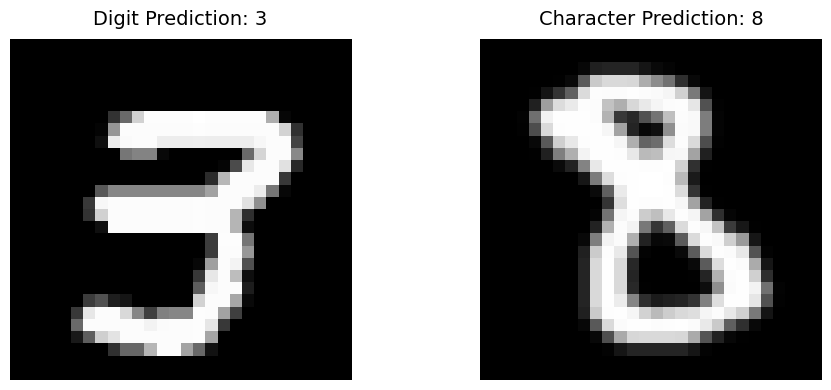

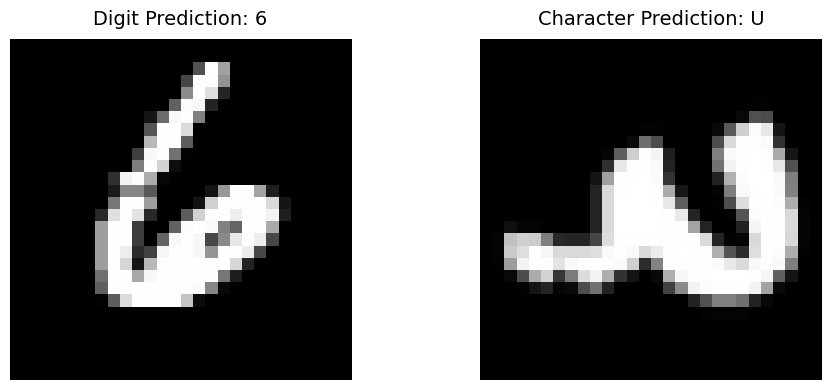

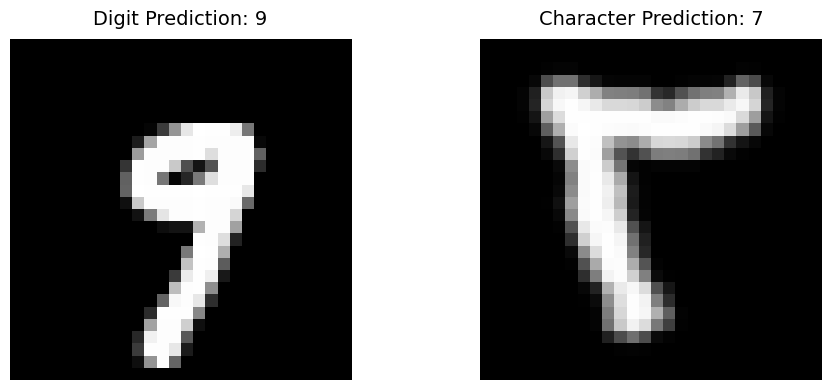

In [ ]:
def run_demo():
    print("HANDWRITTEN CHARACTER RECOGNITION DEMO")
    print("=" * 50)

    # Test on 3 random samples
    for i in range(3):
        # Get random indices
        mnist_idx = np.random.randint(0, len(x_test_mnist))
        emnist_idx = np.random.randint(0, len(x_test_emnist))

        # Get images
        mnist_img = x_test_mnist[mnist_idx]
        emnist_img = x_test_emnist[emnist_idx]

        # Get predictions
        digit_pred = predict_character(mnist_model, mnist_img)
        char_pred = predict_character(emnist_model, emnist_img, True)

        # Display results
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

        # MNIST digit
        ax1.imshow(mnist_img.squeeze(), cmap='gray')
        ax1.set_title(f'Digit Prediction: {digit_pred}', fontsize=14, pad=10)
        ax1.axis('off')

        # EMNIST character
        ax2.imshow(emnist_img.squeeze(), cmap='gray')
        ax2.set_title(f'Character Prediction: {char_pred}', fontsize=14, pad=10)
        ax2.axis('off')

        plt.tight_layout()
        plt.show()
        print()

run_demo()